<a href="https://colab.research.google.com/github/CodingWithMK/Global_AI_Hub_Akbank_ML_Bootcamp_Boston_Housing/blob/main/GlobalAIHub_ML_Bootcamp_Project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Importing required Libraries**

In [30]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
import tensorflow as tf
import xgboost as xgb

# **2 - Uploading Dataset**

In [2]:
# Uploading dataset
from google.colab import files
uploaded_data = files.upload()

Saving boston_housing.csv to boston_housing.csv


In [3]:
df_column_names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df = pd.read_csv("boston_housing.csv", header=None, delimiter=r'\s+', names=df_column_names)

In [ ]:
df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# **3 - Exploratory Data Analysis**

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.shape

(506, 14)

<Axes: >

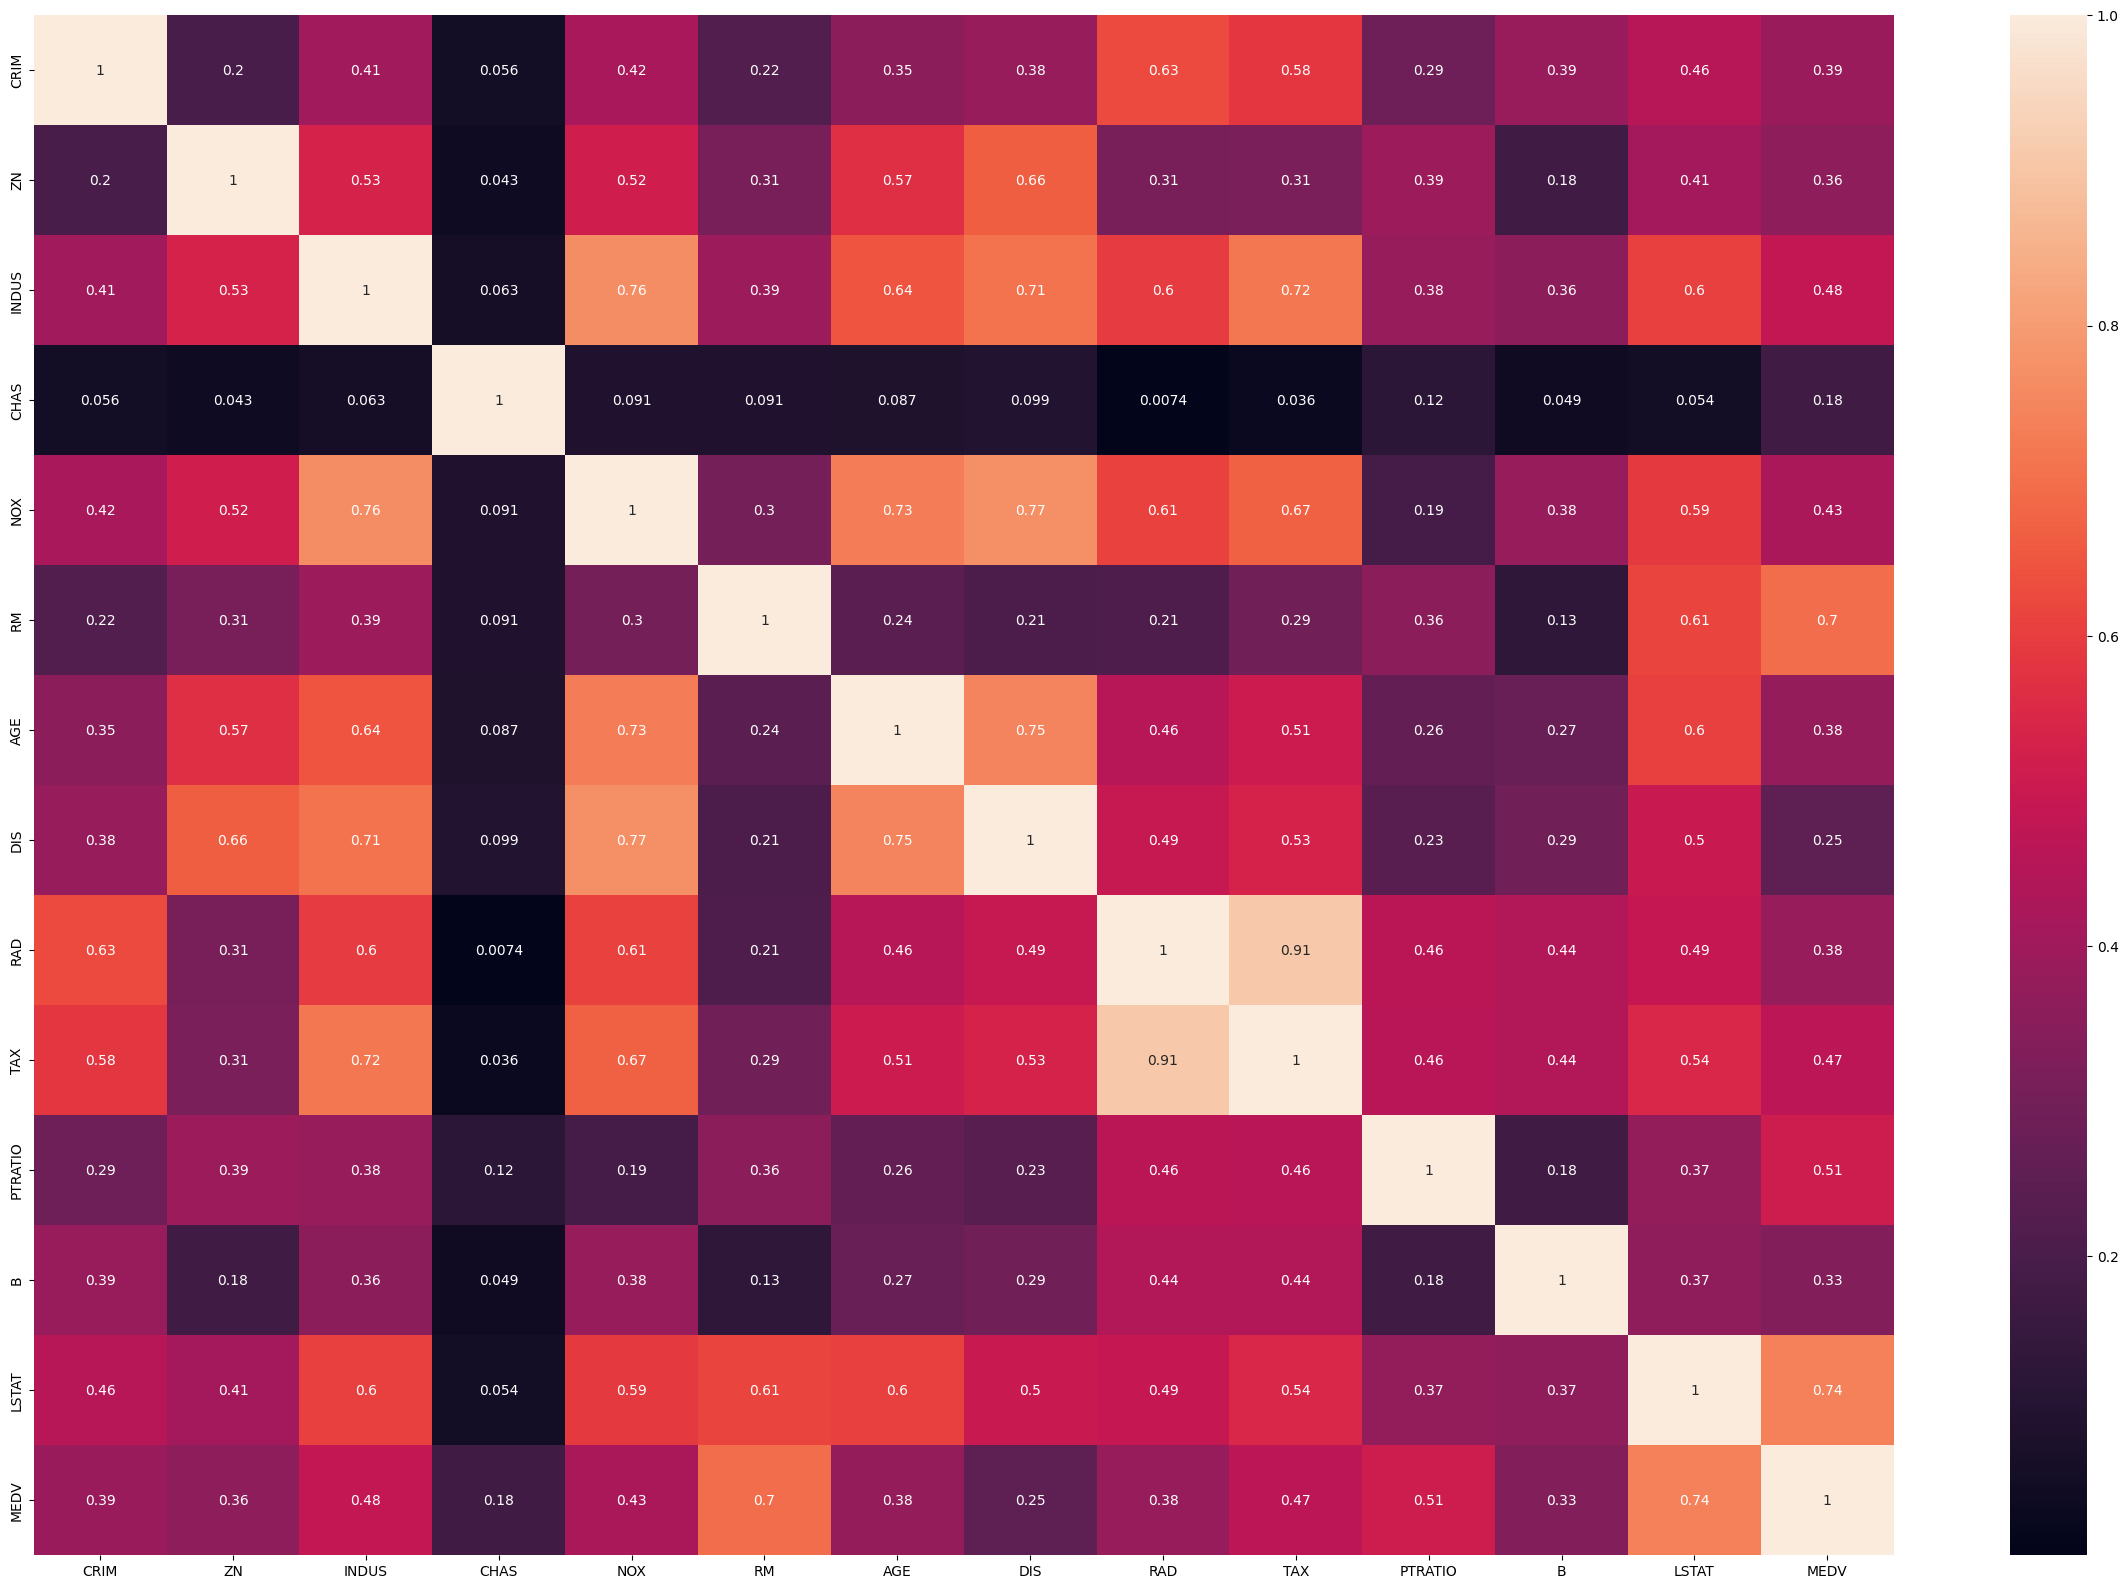

In [ ]:
plt.figure(figsize=(30, 20))

sns.heatmap(df.corr().abs(), annot=True)

# **Data Preprocessing**

In [5]:
# Deviding data into features and target variable

X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [ ]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

pipeline.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [ ]:
pipeline.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [ ]:
pred = pipeline.predict(X)

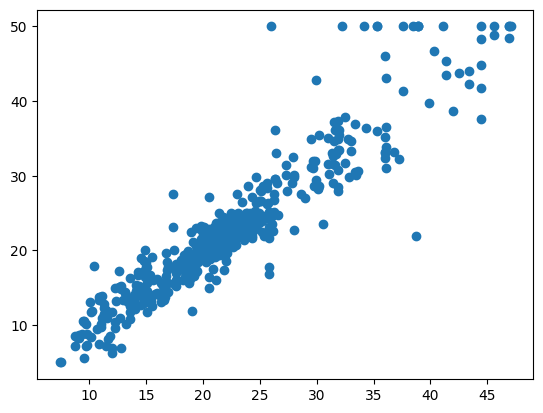

In [ ]:
plt.scatter(pred, y)

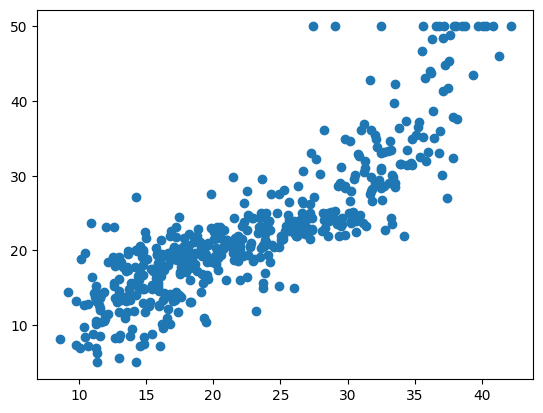

In [ ]:
pipe_1 = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=100)),
    ('model', LinearRegression())
])

pred_1 = pipe_1.fit(X, y).predict(X)
plt.scatter(pred_1, y)

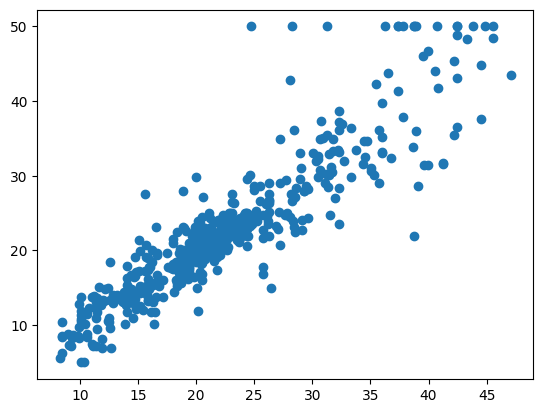

In [ ]:
pipe_2 = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=100)),
    ('model', KNeighborsRegressor())
])

pred_2 = pipe_2.fit(X, y).predict(X)
plt.scatter(pred_2, y)

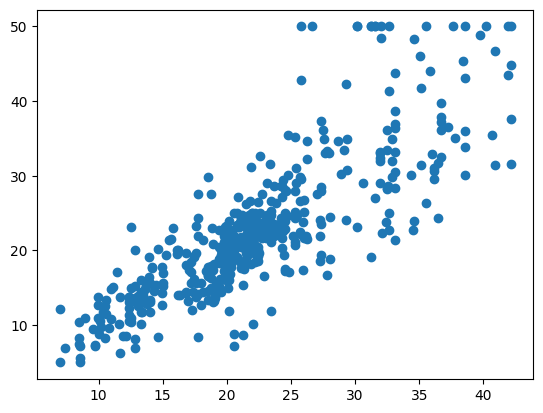

In [ ]:
pipe_3 = Pipeline([
    ('scale', OneHotEncoder(handle_unknown='ignore')),
    ('model', KNeighborsRegressor())
])

pred_3 = pipe_3.fit(X, y).predict(X)
plt.scatter(pred_3, y)

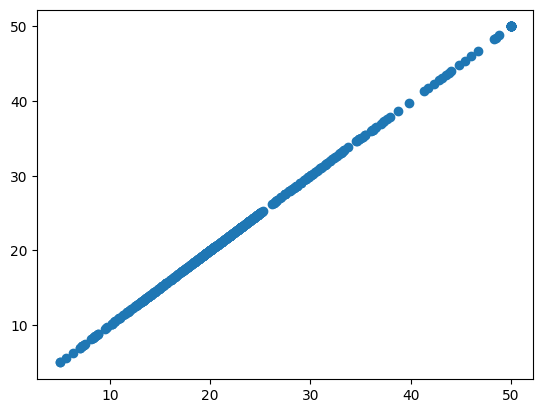

In [ ]:
pipe_4 = Pipeline([
    ('scale', OneHotEncoder(handle_unknown='ignore')),
    ('model', LinearRegression())
])

pred_4 = pipe_4.fit(X, y).predict(X)
plt.scatter(pred_4, y)

# That perfect regression line would be amazing. But not the same as in real life!

"Update! I want to scale the data in pipe_5 with these parameters using the fit_tranform() method. Let's see how this affects the regression line."

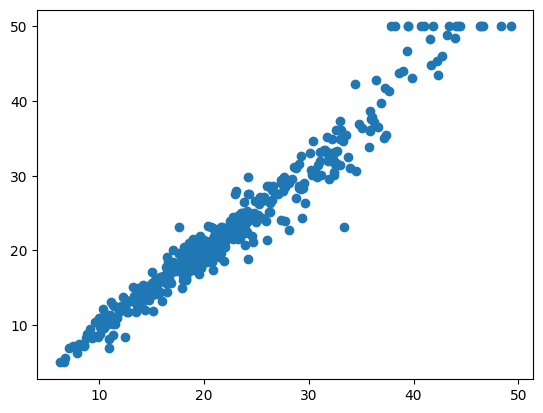

In [6]:
pipe_5 = Pipeline([
    ('scale', OneHotEncoder(handle_unknown='ignore')),
    ('model', RandomForestRegressor())
])

pred_5 = pipe_5.fit(X, y).predict(X)
plt.scatter(pred_5, y)

# That looks way better!!! Now try to handle with the outlier values.
'''Update! I want to scale the data in pipe_5 with these parameters using the fit_tranform() method. Let's see how this affects the regression line.'''

In [7]:
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, test_size=0.2, random_state=42)

In [9]:
pipe_scaled = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor())
])

# **Model Selection**

In [ ]:
'''I forgot to make a performance test with the cross_val_score() method.
Maybe, we can use the r2 score and mse score methods as well to get a better overview for the performance.
However, let's use the cross validation, r2_score and mse score methods to check the performance of our preprocessed data.
'''

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
cross_val_scores = cross_val_score(pipe_scaled, X_train, y_train, cv=5)

In [ ]:
print("Cross-Validation Score: ", cross_val_scores)
print("Mean CV Score: ", cross_val_scores.mean())

Cross-Validation Score:  [0.79473394 0.62929385 0.78231756 0.72336126 0.73108896]
Mean CV Score:  0.7321591127390382


# **Model Building**

In [13]:
model_pipeline = Pipeline([
    ('scale', OneHotEncoder(handle_unknown='ignore')),
    ('model', RandomForestRegressor())
])

model = model_pipeline.fit(X_train, y_train)

In [17]:
model_pred = model.predict(X_test)

mse = mean_squared_error(y_test, model_pred)
r2_scr = r2_score(y_test, model_pred)

print("Mean Squarred Error: ", mse)
print("R-squred (R2): ", r2_scr)

Mean Squarred Error:  34.89807337254901
R-squred (R2):  0.524120100332823


'The model training is weak with the RandomForestRegressor because of too expensive prices and not equal or near values for the categorical data\nFor better performance in the model I will try the KNeighboursRegressor and for optimization maybe the StandartScaler and OneHotEncoder.'

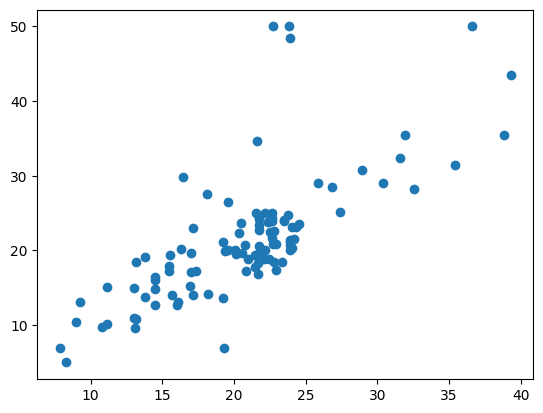

In [15]:
plt.scatter(model_pred, y_test)

'''The model training is weak with the RandomForestRegressor because of too expensive prices and not equal or near values for the categorical data
For better performance in the model I will try the KNeighboursRegressor and for optimization maybe the StandartScaler and OneHotEncoder.'''

In [19]:
model_pipeline_1 = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor())
])

model_1 = model_pipeline_1.fit(X_train, y_train)

In [20]:
model_pred_1 = model_1.predict(X_test)

mse_1 = mean_squared_error(y_test, model_pred_1)
r2_scr_1 = r2_score(y_test, model_pred_1)

print("Mean Squarred Error: ", mse_1)
print("R-squred (R2): ", r2_scr_1)

Mean Squarred Error:  20.60552941176471
R-squred (R2):  0.7190172315709293


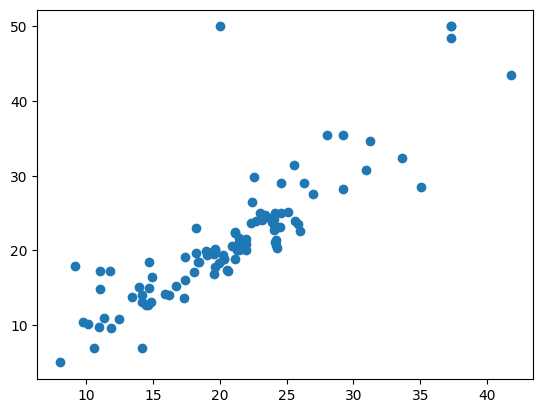

In [ ]:
plt.scatter(model_pred_1, y_test)

# Ok. this is way better but we have still a extrem outlier data right at the middle top of the scatter plot. Now let us try with OneHotencoder scaling.

In [21]:
model_pipeline_2 = Pipeline([
    ('scale', OneHotEncoder(handle_unknown='ignore')),
    ('model', KNeighborsRegressor())
])

model_2 = model_pipeline_2.fit(X_train, y_train)

In [23]:
model_pred_2 = model_2.predict(X_test)

mse_2 = mean_squared_error(y_test, model_pred_2)
r2_scr_2 = r2_score(y_test, model_pred_2)

print("Mean Squarred Error: ", mse_2)
print("R-squred (R2): ", r2_scr_2)

Mean Squarred Error:  54.56961176470588
R-squred (R2):  0.25587349495654244


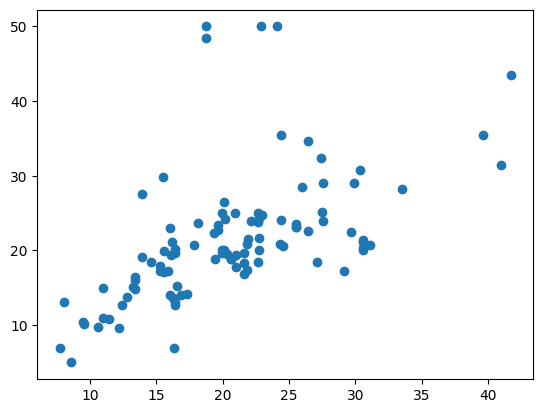

In [ ]:
plt.scatter(model_pred_2, y_test)

# Not as I expected. Now let's try with LinearRegression.

In [25]:
model_pipeline_3 = Pipeline([
    ('scale', OneHotEncoder(handle_unknown='ignore')),
    ('model', LinearRegression())
])

model_3 = model_pipeline_3.fit(X_train, y_train)

In [26]:
model_pred_3 = model_3.predict(X_test)

mse_3 = mean_squared_error(y_test, model_pred_3)
r2_scr_3 = r2_score(y_test, model_pred_3)

print("Mean Squarred Error: ", mse_3)
print("R-squred (R2): ", r2_scr_3)

Mean Squarred Error:  38.53378119204514
R-squred (R2):  0.4745425705393891


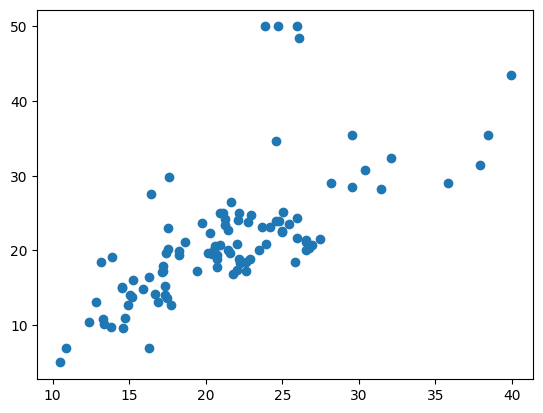

In [ ]:
plt.scatter(model_pred_3, y_test)

# Yeah, this could be a little bit better.

In [27]:
model_pipeline_4 = Pipeline([
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

model_4 = model_pipeline_4.fit(X_train, y_train)

# I think with this model the prediction will be a perfect regression line again. :)

In [28]:
model_pred_4 = model_4.predict(X_test)

mse_4 = mean_squared_error(y_test, model_pred_4)
r2_scr_4 = r2_score(y_test, model_pred_4)

print("Mean Squarred Error: ", mse_4)
print("R-squred (R2): ", r2_scr_4)

Mean Squarred Error:  24.291119474973517
R-squred (R2):  0.668759493535632


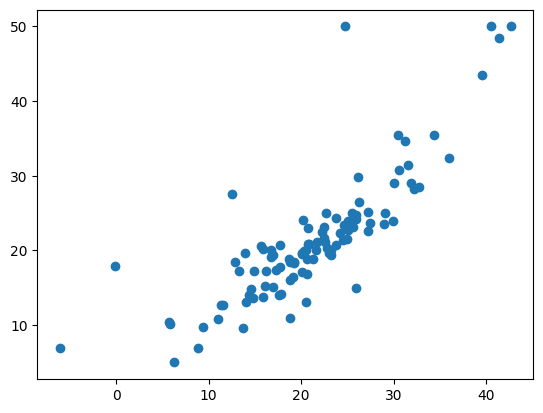

In [ ]:
plt.scatter(model_pred_4, y_test)

In [ ]:
'''
I think the model with StandardScaler and KNeighboursRegressor as model is the best so far. I will look for that.
'''

In [31]:
'''So, the predictions are done. Now I will build some model using the DecisionTreeRegressor, RandomForestRegressor
  and using xgboost. After that, I will choose one of them with lowest Mean Squared Error and best R2-squared Error.
'''

'So, the predictions are done. Now I will build some model using the DecisionTreeRegressor, RandomForestRegressor\n  and using xgboost. After that, I will choose one of them with lowest Mean Squared Error and best R2-squared Error.\n'

In [32]:
decision_tree_model = DecisionTreeRegressor(random_state=42)

decision_tree_model.fit(X_train, y_train)

decision_tree_pred = decision_tree_model.predict(X_test)

mse_decision_tree = mean_squared_error(y_test, decision_tree_pred)
r2_decision_tree = r2_score(y_test, decision_tree_pred)

print("Mean Squared Error (Decision Tree): ", mse_decision_tree)
print("R-Squarred (R2 Decission Tree): ", r2_decision_tree)

Mean Squared Error (Decision Tree):  10.416078431372549
R-Squarred (R2 Decission Tree)  0.8579634380978161


In [33]:
randomforest_model = RandomForestRegressor(n_estimators=100, random_state=42)

randomforest_model.fit(X_train, y_train)

randomforest_pred = randomforest_model.predict(X_test)

mse_randomforest = mean_squared_error(y_test, randomforest_pred)
r2_randomforest = r2_score(y_test, randomforest_pred)

print("Mean Squared Error (RandomForest): ", mse_randomforest)
print("R-Squared (RandomForest): ", r2_randomforest)

Mean Squared Error (RandomForest)  7.9271453333333355
R-Squared Error (RandomForest)  0.891903226702447


In [36]:
xgboost_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgboost_model.fit(X_train, y_train)

xgboost_pred = xgboost_model.predict(X_test)

mse_xgboost = mean_squared_error(y_test, xgboost_pred)
r2_xgboost = r2_score(y_test, xgboost_pred)

print("Mean Squared Error (XGBoost): ", mse_xgboost)
print("R-Squared (XGBoost): ", r2_xgboost)

Mean Squared Error (XGBoost):  6.909231565384943
R-Squared Error (XGBoost):  0.9057837838492537


In [37]:
# The prediction with these 3 Regression model are more percise as I expected. Now, let's get the hyper parameters of these three models that we can decide better which model we will use.

In [38]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [39]:
randomforest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [40]:
xgboost_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [41]:
# Ok. I decided to use RandomForestRegressor for the final model because its hyperparameters are not to complicated and it gives back a solid prediction, mse and r2 error score.

In [43]:
# This time I will set a max_depth of 100 and a max_features of 10

final_model = RandomForestRegressor(n_estimators=100, max_depth=100, max_features=10)

final_model.fit(X_train, y_train)

final_model_pred = final_model.predict(X_test)
mse_final_model = mean_squared_error(y_test, final_model_pred)
r2_final_model = r2_score(y_test, final_model_pred)

print("Mean Squared Error (final): ", mse_final_model)
print("R-Squared (final): ", r2_final_model)

Mean Squared Error (final):  8.320205401960775
R-Squared Error (final):  0.8865433495532193


# **Model Evaluation**

In [44]:
'''So, for the model evaluation I will use RandomizedSerachCV without thinking about it. The reason for that:
  1. GridSearchCV is more complex for categorical data (My opinion)
  2. RandomizedSearchCV works in the slightly same logic as RandomForestRegressor by choosing random data and comparing it.

  Because of that I think we will get a overall solid and percise prediction score with RandomizedSearchCV!!!
'''

'So, for the model evaluation I will use RandomizedSerachCV without thinking about it. The reason for that:\n  1. GridSearchCV is more complex for categorical data (My opinion)\n  2. RandomizedSearchCV works in the slightly same logic as RandomForestRegressor by choosing random data and comparing it.\n\n  Because of that I think we will get a overall solid and percise prediction score with RandomizedSearchCV!!!\n'

In [45]:
search_grid = {
    'n_estimators': [100, 200, 500, 1000, 1200],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model_1 = RandomForestRegressor(n_jobs=1)

In [46]:
rscv_model = RandomizedSearchCV(estimator=final_model_1, param_distributions=search_grid, n_iter=10, cv=5, verbose=2)
rscv_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END max_depth=None, max_featu

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         1200]},
                   verbose=2)

In [47]:
# Getting the hyperparameters for the rscv model

rscv_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1.0,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': 1,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(n_jobs=1),
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'n_estimators': [100, 200, 500, 1000, 1200],
  'max_depth': [None, 5, 10, 20, 30],
  'max_features': ['auto', 'sqrt'],
  'min_samples_split': [2, 4, 6],
  'min_samples_leaf': [1, 2, 4]},
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'refit': True,
 'return_train_score': False,
 's

In [48]:
# Getting the best hyperparameters for the rscv model

rscv_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [50]:
rscv_pred = rscv_model.predict(X_test)

mse_rscv = mean_squared_error(y_test, rscv_pred)
r2_rscv = r2_score(y_test, rscv_pred)

print("Mean Squared Error (RandomizedSearchCV): ", mse_rscv)
print("R-Squared (RandomizedSearchCV): ", r2_rscv)

Mean Squared Error (RandomizedSearchCV):  10.166883988170497
R-Squared (RandomizedSearchCV):  0.8613615232976108
